In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [3]:
df = pd.read_clipboard(skiprows=[1], parse_dates=[0])
df.head()

,日期,开盘,收盘,涨跌额,涨跌幅,最低,最高,成交量(手),成交金额(万),换手率
0,2019-06-17,907.00,911.60,-1.40,-0.15%,906.02,926.94,32769,300151.22,0.26%
1,2019-06-14,911.00,913.00,3.00,0.33%,910.02,932.30,42455,390567.91,0.34%
2,2019-06-13,910.00,910.00,3.30,0.36%,897.00,912.30,32917,298474.16,0.26%
3,2019-06-12,906.22,906.70,-4.19,-0.46%,894.00,910.99,37747,342089.94,0.30%
4,2019-06-11,876.00,910.89,39.81,4.57%,875.00,915.61,80106,720908.69,0.64%


### 5.2 	绘制股票OHLC线图

In [4]:
df_ohlc = pd.DataFrame(df, columns=['日期', '开盘', '收盘', '最低', '最高'])

In [5]:
df_ohlc.head()

,日期,开盘,收盘,最低,最高
0,2019-06-17,907.00,911.60,906.02,926.94
1,2019-06-14,911.00,913.00,910.02,932.30
2,2019-06-13,910.00,910.00,897.00,912.30
3,2019-06-12,906.22,906.70,894.00,910.99
4,2019-06-11,876.00,910.89,875.00,915.61


In [6]:
df_ohlc = df_ohlc.set_index('日期')
df_ohlc.head()

,开盘,收盘,最低,最高
日期,,,,
2019-06-17,907.00,911.60,906.02,926.94
2019-06-14,911.00,913.00,910.02,932.30
2019-06-13,910.00,910.00,897.00,912.30
2019-06-12,906.22,906.70,894.00,910.99
2019-06-11,876.00,910.89,875.00,915.61


Text(0.5, 1.0, '股票OHLC线图')

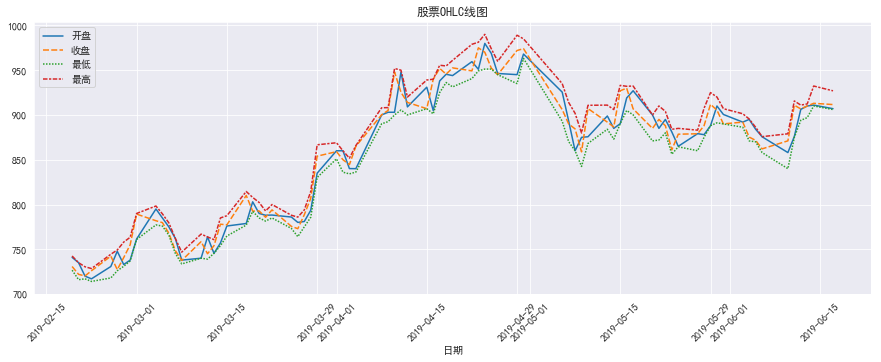

In [7]:
sns.set_style('darkgrid',{'font.sans-serif':['SimHei','Arial']})

plt.figure(figsize=(15, 5))
g = sns.lineplot(data=df_ohlc)
plt.xticks(rotation=45)
plt.title('股票OHLC线图')

### 5.3 	绘制股票成交量线图

In [8]:
df['星期'] = df['日期'].dt.day_name()
df.head()

,日期,开盘,收盘,涨跌额,涨跌幅,最低,最高,成交量(手),成交金额(万),换手率,星期
0,2019-06-17,907.00,911.60,-1.40,-0.15%,906.02,926.94,32769,300151.22,0.26%,Monday
1,2019-06-14,911.00,913.00,3.00,0.33%,910.02,932.30,42455,390567.91,0.34%,Friday
2,2019-06-13,910.00,910.00,3.30,0.36%,897.00,912.30,32917,298474.16,0.26%,Thursday
3,2019-06-12,906.22,906.70,-4.19,-0.46%,894.00,910.99,37747,342089.94,0.30%,Wednesday
4,2019-06-11,876.00,910.89,39.81,4.57%,875.00,915.61,80106,720908.69,0.64%,Tuesday


(array([737105., 737119., 737133., 737147., 737150., 737164., 737178.,
        737180., 737194., 737208., 737211., 737225.]),
 <a list of 12 Text xticklabel objects>)

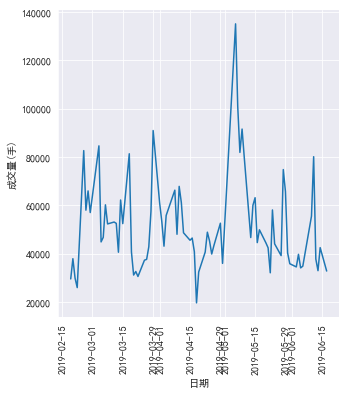

In [9]:
g = sns.relplot(x='日期', y='成交量(手)', data=df, kind='line')
plt.xticks(rotation=90)

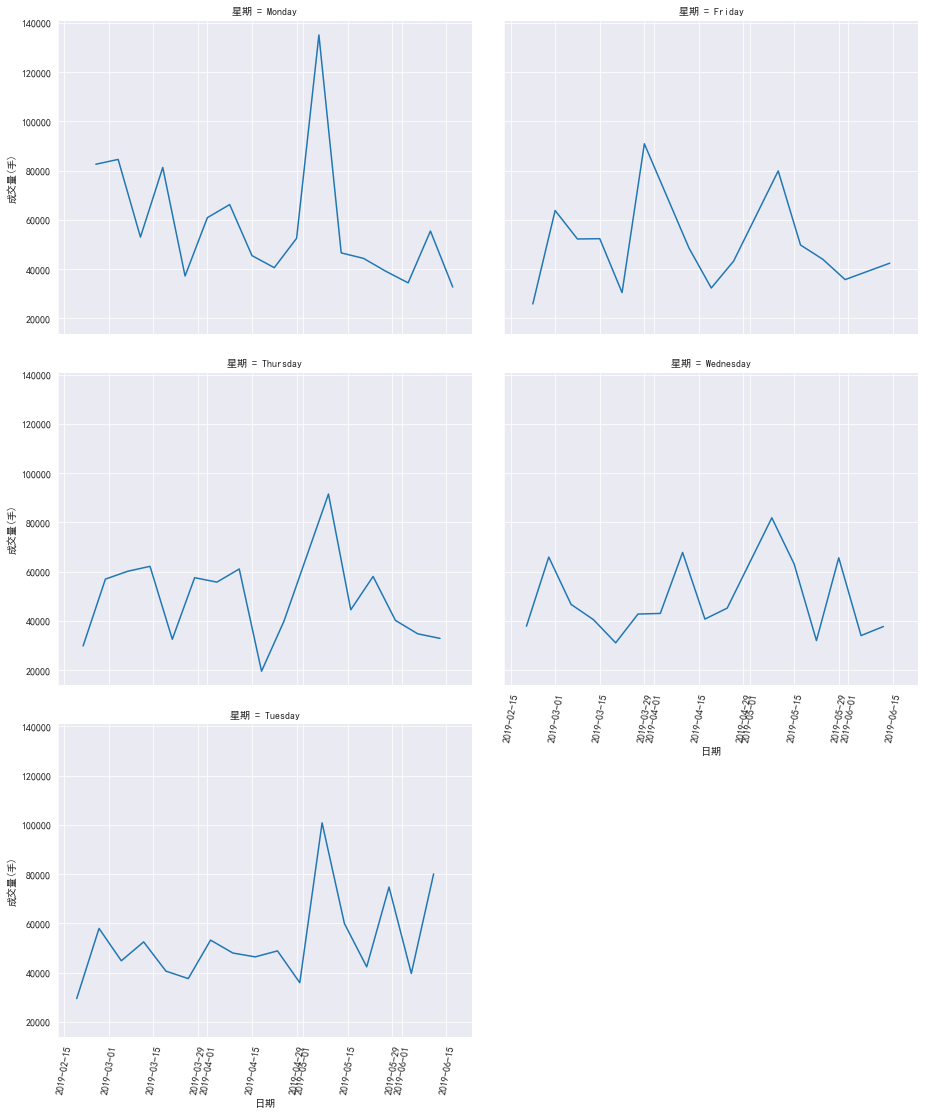

In [10]:
g = sns.relplot(x='日期', y='成交量(手)', data=df, kind='line', col='星期', col_wrap=2, aspect=1.3)
# plt.xticks(rotation=80)
loc ,labels = plt.xticks() # labels是x轴标签对象
g.set_xticklabels(labels, rotation=80)

### 5.4 	绘制股票K线图

In [14]:
import mpl_finance as mf
import matplotlib.dates as mdates

In [18]:
df.head()

,日期,开盘,收盘,涨跌额,涨跌幅,最低,最高,成交量(手),成交金额(万),换手率,星期
0,2019-06-17,907.00,911.60,-1.40,-0.15%,906.02,926.94,32769,300151.22,0.26%,Monday
1,2019-06-14,911.00,913.00,3.00,0.33%,910.02,932.30,42455,390567.91,0.34%,Friday
2,2019-06-13,910.00,910.00,3.30,0.36%,897.00,912.30,32917,298474.16,0.26%,Thursday
3,2019-06-12,906.22,906.70,-4.19,-0.46%,894.00,910.99,37747,342089.94,0.30%,Wednesday
4,2019-06-11,876.00,910.89,39.81,4.57%,875.00,915.61,80106,720908.69,0.64%,Tuesday


In [22]:
quotes_df = df.set_index('日期')
quotes_df.head()

,开盘,收盘,涨跌额,涨跌幅,最低,最高,成交量(手),成交金额(万),换手率,星期
日期,,,,,,,,,,
2019-06-17,907.00,911.60,-1.40,-0.15%,906.02,926.94,32769,300151.22,0.26%,Monday
2019-06-14,911.00,913.00,3.00,0.33%,910.02,932.30,42455,390567.91,0.34%,Friday
2019-06-13,910.00,910.00,3.30,0.36%,897.00,912.30,32917,298474.16,0.26%,Thursday
2019-06-12,906.22,906.70,-4.19,-0.46%,894.00,910.99,37747,342089.94,0.30%,Wednesday
2019-06-11,876.00,910.89,39.81,4.57%,875.00,915.61,80106,720908.69,0.64%,Tuesday


(array([737105., 737119., 737133., 737147., 737150., 737164., 737178.,
        737180., 737194., 737208., 737211., 737225.]),
 <a list of 12 Text xticklabel objects>)

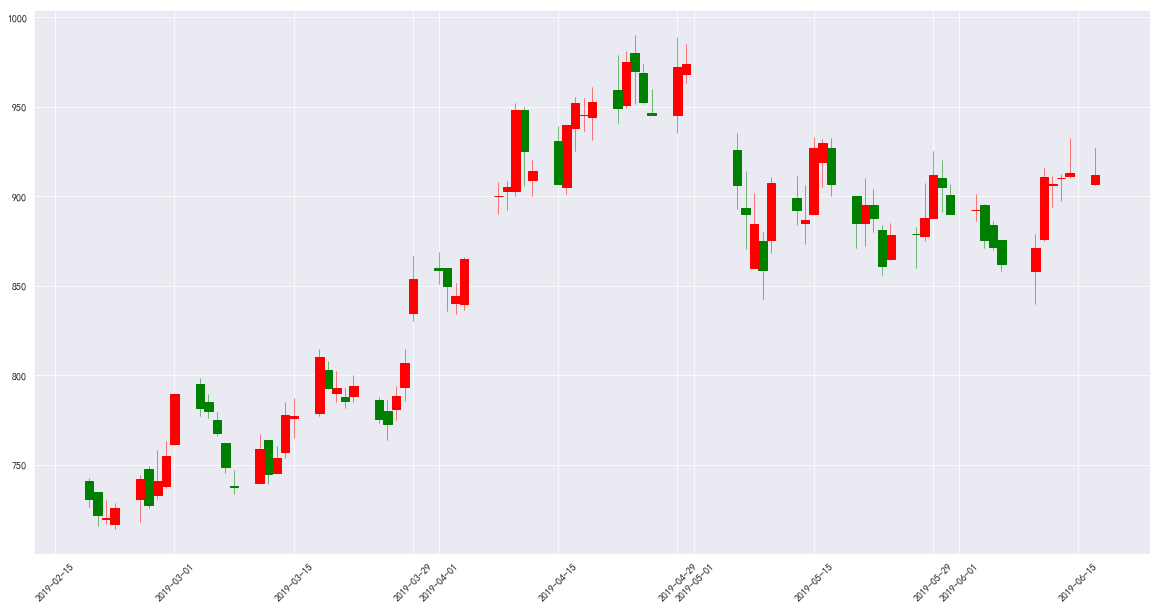

In [28]:
quotes_data = zip(mdates.date2num(quotes_df.index.to_pydatetime()), 
                  quotes_df['开盘'],  quotes_df['最高'],  quotes_df['最低'],  quotes_df['收盘'] )

fig, ax = plt.subplots(figsize=(20, 10))
g = mf.candlestick_ohlc(ax, quotes_data, width=1, colorup='r', colordown='g')
ax.xaxis_date()
plt.xticks(rotation=45)